<a href="https://colab.research.google.com/github/dR0ski/MIT-Food-CNN/blob/main/Reference_Notebook_Malaria_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

# Problem Definition for Malaria Detection Using CNN

## Context
Malaria is a severe public health issue caused by Plasmodium parasites, transmitted via infected female Anopheles mosquito bites. This disease predominantly affects tropical and subtropical areas and poses significant challenges. Prompt and accurate diagnosis is essential for effective treatment and control, significantly impacting malaria's associated mortality and morbidity.

## Objectives
The primary objective is to develop a Convolutional Neural Network (CNN) model that can automatically classify microscopic images of red blood cells into two categories: parasitized and uninfected. This deep learning approach aims to improve the speed and accuracy of malaria detection, thus facilitating quicker clinical decision-making and enabling timely and appropriate treatment interventions.

## Key Questions
1. How can we effectively train a CNN model to classify red blood cells as parasitized or uninfected with high accuracy using the provided image data?
2. What are the optimal architectures and hyperparameters for the CNN model suited for this task?
3. How can the CNN model be integrated seamlessly into existing healthcare infrastructures to offer real-time diagnostic support?
4. What are the expected improvements in diagnosis time and accuracy when using the CNN model compared to traditional diagnostic methods?
5. How can the model be adapted and scaled to operate efficiently across different regions, especially where healthcare resources are limited?

## Problem Formulation
The challenge involves using data science and deep learning to create a predictive CNN model that accurately classifies images of red blood cells as either parasitized or uninfected. This involves:
- Preprocessing and augmenting image data to train the CNN effectively.
- Experimenting with different CNN architectures to identify the most effective model for recognizing patterns indicative of malaria parasites.
- Validating the model's performance through rigorous testing to ensure high sensitivity and specificity.

## Impact on Population, Hospitals, and Economy
**Population:** Enhanced diagnostic techniques will lead to more effective malaria control, reducing both the prevalence and spread of the disease, improving overall public health outcomes.

**Hospitals:** By automating malaria diagnostics, hospitals can manage their resources better and improve patient care efficiency, particularly in high-burden areas.

**Economy:** A decrease in malaria prevalence can significantly affect economic stability by reducing disease-induced absenteeism and preserving valuable human resources. Improved health outcomes can further contribute to economic growth and stability.

Incorporating a CNN-based approach in malaria diagnostics promises substantial improvements across health, societal, and economic sectors, especially in regions most affected by the disease.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>



###<b> Mount the Drive

In [4]:
#------------------------------------------------------------------------------
# Reusable Variables Declarations
#------------------------------------------------------------------------------
nl = "\n"
ln = "--------------------------------------------------------------------------"
tb = "\t"


In [3]:
#------------------------------------------------------------------------------
# Mounting Google drive / Google.Colab
#------------------------------------------------------------------------------
print("---> Commence Loading Google Drive")
from google.colab import drive
drive.mount('/content/drive')
print("---> Google Drive Mounted Successfully")

---> Commence Loading Google Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
---> Google Drive Mounted Successfully


In [2]:
#------------------------------------------------------------------------------
# Store the directory path for the cell_images.zip
#------------------------------------------------------------------------------
pathZip = '/content/drive/MyDrive/Capstone/cell_images.zip'

#------------------------------------------------------------------------------
# Store the directory path for the file to be unzipped to
#------------------------------------------------------------------------------
pathToExtract = '/content/drive/MyDrive/Capstone/'

### <b>Loading libraries</b>

In [6]:
# ------------------------------------------------------------------------------
# Imports the required data and ML libraries
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}> Commence importation of all required data & ML libraries{nl}{ln}{nl}")
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img # opens image file from directory
from google.colab.patches import cv2_imshow
print(f"{nl}{ln}{nl}> Python Library Import Completed{nl}{ln}{nl}")


--------------------------------------------------------------------------
> Commence importation of all required data & ML libraries
--------------------------------------------------------------------------


--------------------------------------------------------------------------
> Python Library Import Completed
--------------------------------------------------------------------------



### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [7]:
# Unzips file
# ------------------------------------------------------------------------------
with zipfile.ZipFile(pathZip, 'r') as zip_ref:
    zip_ref.extractall(pathToExtract)
print(f"{nl}{ln}{nl}Unzipping Completed!{nl}{ln}{nl}")

KeyboardInterrupt: 

In [9]:
# ------------------------------------------------------------------------------
# LOADING DATA : TRAINING & TESTING DATA SET
# ------------------------------------------------------------------------------
# Brute force approach for loading data
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}> Commence loading of data {nl}{ln}{nl}")

DATADIR = '/content/drive/MyDrive/Capstone/cell_images/train' # Path to training data set
DATADIR_test = '/content/drive/MyDrive/Capstone/cell_images/test' # Path to testing data set
CATEGORIES = ['parasitized', 'uninfected'] # Folders within the data set under the training folder
IMG_SIZE = 150 # Set Image Size, such that our system doesnt run out of memory



--------------------------------------------------------------------------
> Commence loading of data 
--------------------------------------------------------------------------



The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [10]:
# ------------------------------------------------------------------------------
# LOADING DATA
# ------------------------------------------------------------------------------
# Brute force approach for loading training data
# ------------------------------------------------------------------------------
def create_training_data(directory):
  print(f"{nl}{ln}{nl}> Leveraging brute force approach to loading data sets. {nl}{ln}{nl}")
  t_data = []

  for category in CATEGORIES:
    path = os.path.join(directory, category)
    class_num = category

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img)) # Read each image file in the directory that is in focus
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize each image to 150X150 pixels to save space in memory
      t_data.append([new_array, class_num]) # Append the image and it's category to the 'training_data' python list
  print(f"{nl}{ln}{nl}> Data loading & resizing complaeted.{nl}{ln}{nl}")
  return t_data

In [12]:
# ------------------------------------------------------------------------------
# LOADING DATA : TRAINING DATA SET
# ------------------------------------------------------------------------------
training_data = create_training_data(DATADIR)


--------------------------------------------------------------------------
> Leveraging brute force approach to loading data sets. 
--------------------------------------------------------------------------


--------------------------------------------------------------------------
> Data loading & resizing complaeted.
--------------------------------------------------------------------------



In [13]:
# ------------------------------------------------------------------------------
# LOADING DATA : TESTING DATA SET
# ------------------------------------------------------------------------------
testing_data = create_training_data(DATADIR_test)


--------------------------------------------------------------------------
> Leveraging brute force approach to loading data sets. 
--------------------------------------------------------------------------


--------------------------------------------------------------------------
> Data loading & resizing complaeted.
--------------------------------------------------------------------------



###<b> Check the shape of train and test images

In [14]:
# ------------------------------------------------------------------------------
# Data Shape : TRAINING DATA SET
# ------------------------------------------------------------------------------
training_data[0][0].shape

(150, 150, 3)

In [15]:
# ------------------------------------------------------------------------------
# Data Shape : TESTING DATA SET
# ------------------------------------------------------------------------------
testing_data[0][0].shape

(150, 150, 3)

###<b> Check the shape of train and test labels

In [16]:
# ------------------------------------------------------------------------------
# Load Labels : DATA SET AGNOSTIC
# ------------------------------------------------------------------------------
def loading_labels(data_dir, cat_num):
  # ----------------------------------------------------------------------------
  # Stores the names of image files into a Python list
  # ----------------------------------------------------------------------------
  labels = [fn for fn in os.listdir(f"{data_dir}/{CATEGORIES[cat_num]}")]

  # ----------------------------------------------------------------------------
  # Loads bread filenames into a numpy array
  # Select nine (9) random breads
  # ----------------------------------------------------------------------------
  load_numpy = np.random.choice(labels, 12, replace=False)
  nm_py = np.array(labels)


  return {"subset_images": load_numpy, "array":nm_py, "image_count": len(labels)}


In [17]:
print(f"{nl}{ln}{nl}Training Data Set: Parasitized Labels Shape{nl}{ln}{nl}")
select_train_parasitized = loading_labels(DATADIR, 0)
select_train_parasitized["array"].shape



--------------------------------------------------------------------------
Training Data Set: Parasitized Labels Shape
--------------------------------------------------------------------------



(12582,)

In [18]:
print(f"{nl}{ln}{nl}Training Data Set: Uninfected Labels Shape{nl}{ln}{nl}")
select_train_unifected = loading_labels(DATADIR, 1)
select_train_unifected["array"].shape


--------------------------------------------------------------------------
Training Data Set: Uninfected Labels Shape
--------------------------------------------------------------------------



(12376,)

In [19]:
print(f"{nl}{ln}{nl}Test Data Set: Parasitized Labels Shape{nl}{ln}{nl}")
select_test_parasitized = loading_labels(DATADIR_test, 0)
select_test_parasitized["array"].shape


--------------------------------------------------------------------------
Test Data Set: Parasitized Labels Shape
--------------------------------------------------------------------------



(1300,)

In [20]:
print(f"{nl}{ln}{nl}Test Data Set: Uninfected Labels Shape{nl}{ln}{nl}")
select_test_unifected = loading_labels(DATADIR_test, 1)
select_test_unifected["array"].shape


--------------------------------------------------------------------------
Test Data Set: Uninfected Labels Shape
--------------------------------------------------------------------------



(1300,)

####<b> Observations and insights: _____


### <b>Check the minimum and maximum range of pixel values for train and test images

In [21]:
print(f"{nl}{ln}{nl}Min Training Data Pixel{nl}{ln}{nl}")
training_data[0][0].min()


--------------------------------------------------------------------------
Min Training Data Pixel
--------------------------------------------------------------------------



0

In [22]:

print(f"{nl}{ln}{nl}Max Testing Data Pixel{nl}{ln}{nl}")
testing_data[0][0].max()


--------------------------------------------------------------------------
Max Testing Data Pixel
--------------------------------------------------------------------------



222

####<b> Observations and insights: _____



###<b> Count the number of values in both uninfected and parasitized

In [23]:
print(f"{nl}{ln}{nl}Training Data Set: Count of Parasitized Labels{nl}{ln}{nl}")
select_train_parasitized["image_count"]


--------------------------------------------------------------------------
Training Data Set: Count of Parasitized Labels
--------------------------------------------------------------------------



12582

In [24]:
print(f"{nl}{ln}{nl}Training Data Set: Count of Uninfected Labels{nl}{ln}{nl}")
select_train_unifected["image_count"]


--------------------------------------------------------------------------
Training Data Set: Count of Uninfected Labels
--------------------------------------------------------------------------



12376

In [25]:
print(f"{nl}{ln}{nl}Test Data Set: Count of Parasitized Labels{nl}{ln}{nl}")
select_test_parasitized["image_count"]


--------------------------------------------------------------------------
Test Data Set: Count of Parasitized Labels
--------------------------------------------------------------------------



1300

In [26]:
print(f"{nl}{ln}{nl}Test Data Set: Count of Uninfected Labels{nl}{ln}{nl}")
select_test_unifected["image_count"]


--------------------------------------------------------------------------
Test Data Set: Count of Uninfected Labels
--------------------------------------------------------------------------



1300

###<b>Normalize the images

####<b> Observations and insights: _____

###<b> Plot to check if the data is balanced

####<b> Observations and insights: _____

### <b>Data Exploration</b>
Let's visualize the images from the train data

In [27]:
def visualize_data(image_category, dir_position_num, data_dir):
    """
    Function takes an input of image_category which is a numpy array.
    """
    fig = plt.figure(figsize=(12, 12))  # You might need to adjust this depending on the image sizes
    for i in range(9):  # Displaying the first 9 images
        ax = fig.add_subplot(3, 3, i+1)  # Changed to 3x3 grid for 9 images
        file_path = os.path.join(data_dir, CATEGORIES[dir_position_num], image_category[i])

        img = load_img(file_path)  # Opens the image file without resizing
        plt.imshow(img)
        plt.axis('off')  # Turn off the axis
    plt.show()

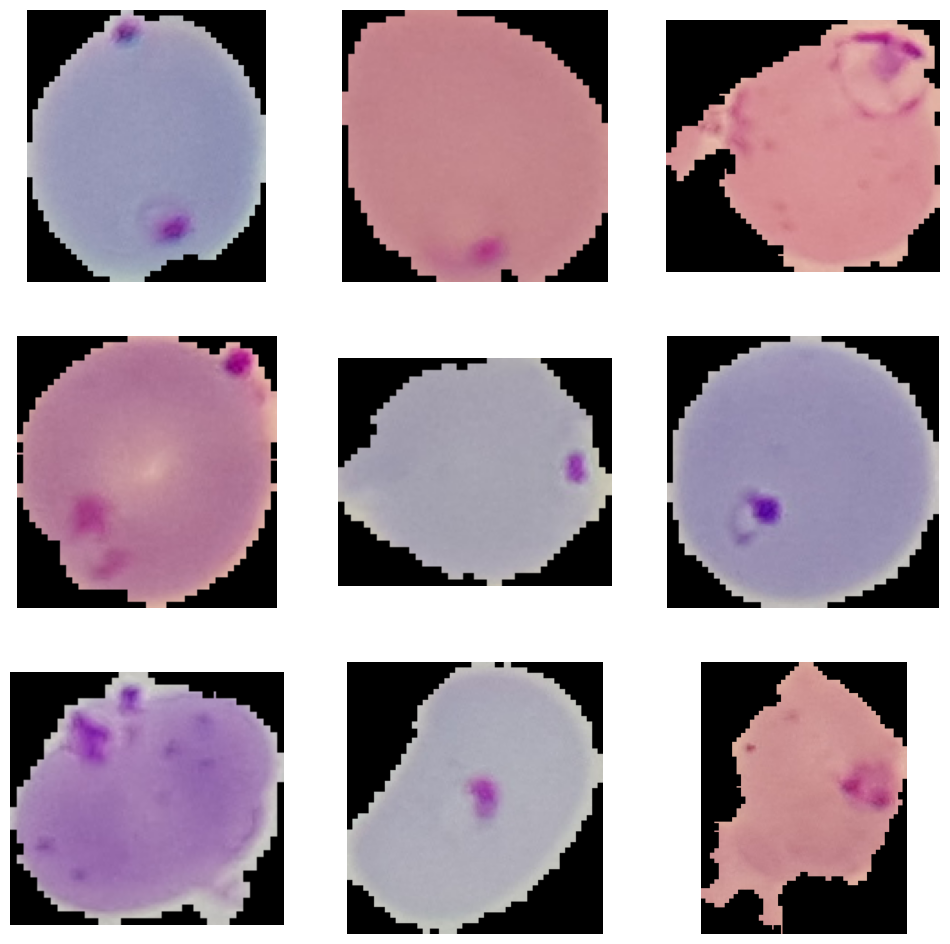

In [28]:
visualize_data(select_train_parasitized["subset_images"], 0, DATADIR)

####<b> Observations and insights: _____

###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

In [29]:
# ------------------------------------------------------------------------------
# VISUALIZING DATA: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Function that takes a numpy array as input
# ------------------------------------------------------------------------------
def visualize_data_plt_figure(image_category, dir_position_num, data_dir):
  """
  Fucntion takes an input of image_category which is a numpy array
  """
  fig = plt.figure(figsize=(12,12))
  for i in range(12):
    ax = fig.add_subplot(6,6, i+1)
    fp = f'{data_dir}/{CATEGORIES[dir_position_num]}/{image_category[i]}'

    fn = load_img(fp, target_size = (150,150))
    plt.imshow(fn,)
    plt.axis('off')



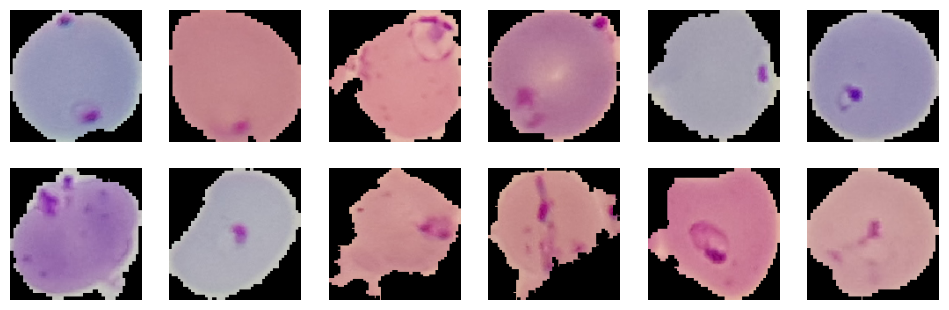

In [30]:
# ------------------------------------------------------------------------------
# VISUALIZING SUBSET OF PARASITIZED CELLS: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Calls the visualization function and passes in the parasitized numpy array for vis.
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_train_parasitized["subset_images"], 0, DATADIR)




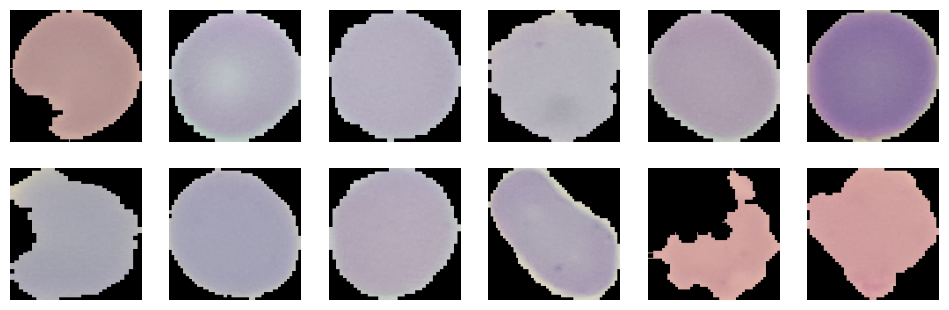

In [31]:
# ------------------------------------------------------------------------------
# VISUALIZING SUBSET OF UNINFECTED CELLS: TRAINING DATA SET
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_train_unifected["subset_images"], 1, DATADIR)


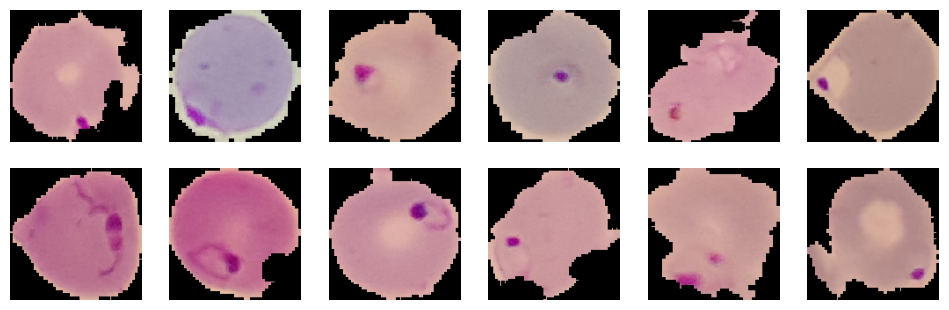

In [32]:
# ------------------------------------------------------------------------------
# VISUALIZING SUBSET OF PARASITIZED CELLS: TEST DATA SET
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_test_parasitized["subset_images"], 0, DATADIR_test)

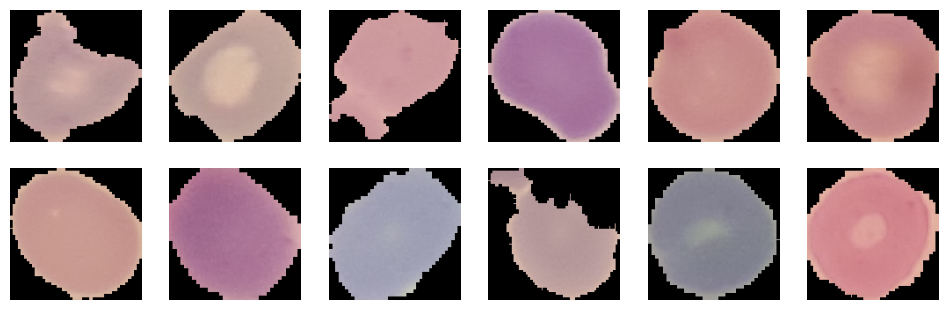

In [33]:
# ------------------------------------------------------------------------------
# VISUALIZING SUBSET OF UNINFECTED CELLS: TEST DATA SET
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_test_unifected["subset_images"], 1, DATADIR_test)


####<b>Observations and insights:

###<b> Plotting the mean images for parasitized and uninfected

In [34]:
# ------------------------------------------------------------------------------
# LOADING TRAINING DATA:
# ------------------------------------------------------------------------------
# Brute force approach for loading training data
# ------------------------------------------------------------------------------
def arrayed_data_set(directory):
  print(f"{nl}{ln}{nl}> Leveraging brute force approach to loading data sets. {nl}{ln}{nl}")
  cat_data =  {category: [] for category in CATEGORIES}  # Dictionary to hold data categorized

  for category in CATEGORIES:
    path = os.path.join(directory, category)
    class_num = category

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img)) # Read each image file in the directory that is in focus
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize each image to 150X150 pixels to save space in memory
      cat_data[category].append(new_array)
  print(f"{nl}{ln}{nl}> Data loading & resizing complaeted.{nl}{ln}{nl}")
  return cat_data

In [45]:
training_dataSet = arrayed_data_set(DATADIR)


--------------------------------------------------------------------------
> Leveraging brute force approach to loading data sets. 
--------------------------------------------------------------------------


--------------------------------------------------------------------------
> Data loading & resizing complaeted.
--------------------------------------------------------------------------



In [46]:
testining_dataSet = arrayed_data_set(DATADIR_test)


--------------------------------------------------------------------------
> Leveraging brute force approach to loading data sets. 
--------------------------------------------------------------------------


--------------------------------------------------------------------------
> Data loading & resizing complaeted.
--------------------------------------------------------------------------



In [59]:
def calculate_mean_images(cat_data):
    mean_images = {}
    for category, images in cat_data.items():
        # Stack images into a 4D numpy array (batch, height, width, channels)
        stacked_images = np.stack(images, axis=0)
        # Calculate mean along the batch dimension
        mean_images[category] = np.mean(stacked_images, axis=0)
    return mean_images

In [63]:
def plot_mean_images(mean_images):
    # Number of categories
    n = len(mean_images)
    fig, axes = plt.subplots(1, n, figsize=(n * 5, 5))  # Adjust subplot size accordingly
    if n == 1:
        axes = [axes]  # Make sure axes is iterable if there's only one category

    for ax, (category, mean_img) in zip(axes, mean_images.items()):
        ax.imshow(mean_img.astype(np.uint8))  # Convert float images to uint8
        ax.set_title(f"Mean Image of {category}")
        ax.axis('off')  # Hide axes

    plt.show()

In [64]:
mean_imgs = calculate_mean_image(training_dataSet)

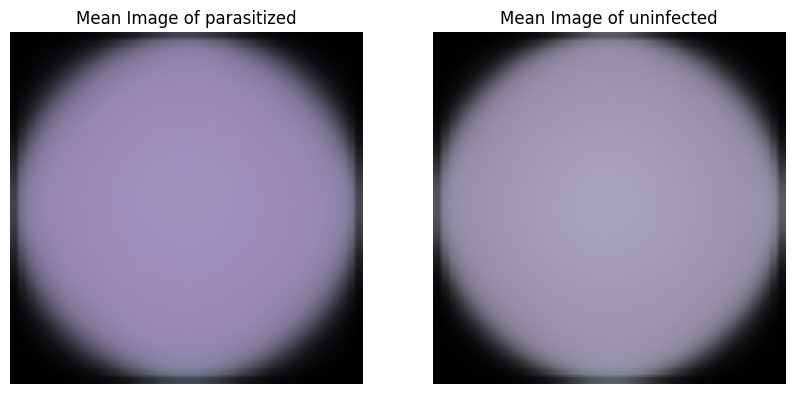

In [65]:
plot_mean_images(mean_imgs)

<b> Mean image for parasitized

In [47]:
# ------------------------------------------------------------------------------
# Training Data: Parasitized Category
# ------------------------------------------------------------------------------
parasitized_mean = np.array(training_dataSet["parasitized"])

In [66]:
# ------------------------------------------------------------------------------
# Training Data: Parasitized Category Shape
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Parasitized Category Shape: {nl}{ln}{nl}{parasitized_mean.shape}{nl}{ln}{nl}")


--------------------------------------------------------------------------
Training Data: Parasitized Category Shape: 
--------------------------------------------------------------------------
(12582, 150, 150, 3)
--------------------------------------------------------------------------



In [69]:
# ------------------------------------------------------------------------------
# Training Data: Parasitized Category Mean
# ------------------------------------------------------------------------------
parasitized_mean.mean(axis=0)

# ------------------------------------------------------------------------------
# Training Data: ParasitizedCategory Mean
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Parasitized Category Mean:  {nl}{ln}{nl}{parasitized_mean.mean()}{nl}{ln}{nl}")

# ------------------------------------------------------------------------------
# Training Data: Parasitized Category Mean Breakdown
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Parasitized Category Mean Breakdown:  {nl}{ln}{nl}{parasitized_mean.mean(axis=0)}{nl}{ln}{nl}")


--------------------------------------------------------------------------
Training Data: Parasitized Category Mean:  
--------------------------------------------------------------------------
117.33440936199274
--------------------------------------------------------------------------


--------------------------------------------------------------------------
Training Data: Parasitized Category Mean Breakdown:  
--------------------------------------------------------------------------
[[[0.08138611 0.08369099 0.11142903]
  [0.05102527 0.05174058 0.06811318]
  [0.05126371 0.05189954 0.06843109]
  ...
  [0.08917501 0.09100302 0.1200922 ]
  [0.07097441 0.07208711 0.0955333 ]
  [0.09370529 0.09577174 0.12756319]]

 [[0.0702591  0.07153076 0.09561278]
  [0.03973931 0.0401367  0.05253537]
  [0.03997775 0.04029566 0.0527738 ]
  ...
  [0.05833731 0.06167541 0.07971706]
  [0.04585916 0.04840248 0.06294707]
  [0.07200763 0.07534573 0.09950723]]

 [[0.07494834 0.07574313 0.10117628]
  [0.042

<b> Mean image for uninfected

In [67]:
# ------------------------------------------------------------------------------
# Training Data: Uninfected Category
# ------------------------------------------------------------------------------
uninfected_mean = np.array(training_dataSet["uninfected"])

# ------------------------------------------------------------------------------
# Training Data: Uninfected Category Shape
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Uninfected Category Shape: {nl}{ln}{nl}{uninfected_mean.shape}{nl}{ln}{nl}")


--------------------------------------------------------------------------
Training Data: Uninfected Category Shape: 
--------------------------------------------------------------------------
(12376, 150, 150, 3)
--------------------------------------------------------------------------



In [68]:
# ------------------------------------------------------------------------------
# Training Data: Uninfected Category Mean
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Uninfected Category Mean:  {nl}{ln}{nl}{uninfected_mean.mean()}{nl}{ln}{nl}")

# ------------------------------------------------------------------------------
# Training Data: Uninfected Category Mean Breakdown
# ------------------------------------------------------------------------------
print(f"{nl}{ln}{nl}Training Data: Uninfected Category Mean Breakdown:  {nl}{ln}{nl}{uninfected_mean.mean(axis=0)}{nl}{ln}{nl}")


--------------------------------------------------------------------------
Training Data: Uninfected Category Mean:  
--------------------------------------------------------------------------
122.51207039431156
--------------------------------------------------------------------------


--------------------------------------------------------------------------
Training Data: Uninfected Category Mean Breakdown:  
--------------------------------------------------------------------------
[[[0.13259535 0.13380737 0.16216871]
  [0.10980931 0.10803167 0.12984809]
  [0.12588882 0.12354557 0.1460892 ]
  ...
  [0.0311086  0.03191661 0.04266322]
  [0.03345184 0.03474467 0.04613769]
  [0.03805753 0.03983516 0.05252101]]

 [[0.09332579 0.09469942 0.11425339]
  [0.06003555 0.05946994 0.07215579]
  [0.07853911 0.0778927  0.09162896]
  ...
  [0.01963478 0.02036199 0.02698772]
  [0.02189722 0.02319005 0.03046218]
  [0.02650291 0.02819974 0.03676471]]

 [[0.09154816 0.09276018 0.10964771]
  [0.05260

####<b> Observations and insights: _____

### <b>Converting RGB to HSV of Images using OpenCV

In [70]:
# ------------------------------------------------------------------------------
# SPLITTING THE DATA SET FUNCTION
# ------------------------------------------------------------------------------
# Function that takes a numpy array as input
# ------------------------------------------------------------------------------

def split_data_along_axis(nmpy_data_array):
  """
  Function takes a numpy array that contains imgs and labels
  """
  try:
    # Holds values for the x axis from the training data set
    x_axis_values = []

    # Holds values for the y axis from the training data set
    y_axis_values = []

    # ------------------------------------------------------------------------------
    # Shuffle training data in a numpy array
    # ------------------------------------------------------------------------------
    np.random.shuffle(nmpy_data_array)

    # ------------------------------------------------------------------------------
    # Loads images to the x axis & labels to the y axis
    # ------------------------------------------------------------------------------

    for img, label in nmpy_data_array:
      x_axis_values.append(img)
      y_axis_values.append(label)

    x_axis_values = np.array(x_axis_values)
    y_axis_values = np.array(y_axis_values)

    return {"x_axis": x_axis_values, "y_axis": y_axis_values}

  except Exception as splitting_error:
    print({"Splitting_Error": splitting_error})


###<b> Converting the train data

In [71]:
# ------------------------------------------------------------------------------
# SPLITTING THE TRAINING DATA SET
# ------------------------------------------------------------------------------
t_data = split_data_along_axis(training_data)
x_train = t_data["x_axis"]
y_train = t_data["y_axis"]

print(f"Training Data X Axis Shape: {x_train.shape}{nl}Training Data Y Axis Shape: {y_train.shape}")

Training Data X Axis Shape: (24958, 150, 150, 3)
Training Data Y Axis Shape: (24958,)


In [72]:
y_train = pd.DataFrame(y_train, columns=['Labels'], dtype=object)

In [73]:
# ------------------------------------------------------------------------------
# Get a count of each categories in the training data
# ------------------------------------------------------------------------------
y_train.Labels.value_counts()

Labels
parasitized    12582
uninfected     12376
Name: count, dtype: int64

In [74]:
# ------------------------------------------------------------------------------
# Calculate the percentage of each categories in the training data
# ------------------------------------------------------------------------------
y_train.Labels.value_counts(normalize=True)

Labels
parasitized    0.504127
uninfected     0.495873
Name: proportion, dtype: float64

###<b> Converting the test data

In [75]:
# ------------------------------------------------------------------------------
# SPLITTING THE TEST DATA SET
# ------------------------------------------------------------------------------
tst_data = split_data_along_axis(testing_data)
x_tst = tst_data["x_axis"]
y_tst = tst_data["y_axis"]

print(f"Testing Data X Axis Shape: {x_tst.shape}{nl}Testing Data Y Axis Shape: {y_tst.shape}")

Testing Data X Axis Shape: (2600, 150, 150, 3)
Testing Data Y Axis Shape: (2600,)


In [76]:
y_tst = pd.DataFrame(y_tst, columns=['Labels'], dtype=object)

In [77]:
# ------------------------------------------------------------------------------
# Get a count of each categories in the test data
# ------------------------------------------------------------------------------
y_tst.Labels.value_counts()

Labels
parasitized    1300
uninfected     1300
Name: count, dtype: int64

In [78]:
# ------------------------------------------------------------------------------
# Calculate the percentage of each categories in the test data
# ------------------------------------------------------------------------------
y_tst.Labels.value_counts(normalize=True)

Labels
parasitized    0.5
uninfected     0.5
Name: proportion, dtype: float64

####<b>Observations and insights: _____

###<b> Processing Images using Gaussian Blurring

In [79]:
def blurred_arrayed_data_set(directory, img_size, kernel_size=(5, 5), sigmaX=0):
    """
    Loads images, resizes them, and applies Gaussian blurring.

    Parameters:
    - directory: The path to the directory containing the image data.
    - img_size: Tuple of integers for resizing the images (width, height).
    - kernel_size: Tuple of integers for the Gaussian kernel size.
    - sigmaX: Standard deviation in X; if 0, it is calculated from the kernel size.
    """
    print("> Starting data loading and processing...")
    cat_data = {category: [] for category in CATEGORIES}  # Dictionary to hold data categorized

    for category in CATEGORIES:
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            if img_array is not None:
                img_array = cv2.resize(img_array, img_size)  # Resize image
                blurred_img = cv2.GaussianBlur(img_array, kernel_size, sigmaX)  # Apply Gaussian Blur
                cat_data[category].append(blurred_img)

    print("> Data loading and processing completed.")
    return cat_data

In [83]:
def plot_sample_images(cat_data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, (category, images) in enumerate(cat_data.items()):
        for j in range(num_samples):
            ax = axes[j]
            ax.imshow(cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct color display
            ax.set_title(f"{category} {j+1}")
            ax.axis('off')
    plt.show()



In [85]:
# Plotting sample images from each category
def g_data(data):
  for category in data:
      print(f"Displaying {category} samples with Gaussian Blur")
      plot_sample_images({category: data[category]})

###<b> Gaussian Blurring on train data

In [81]:
IMG_SIZE = (150, 150)
gaus_data = blurred_arrayed_data_set(DATADIR, IMG_SIZE)

> Starting data loading and processing...
> Data loading and processing completed.


Displaying parasitized samples with Gaussian Blur


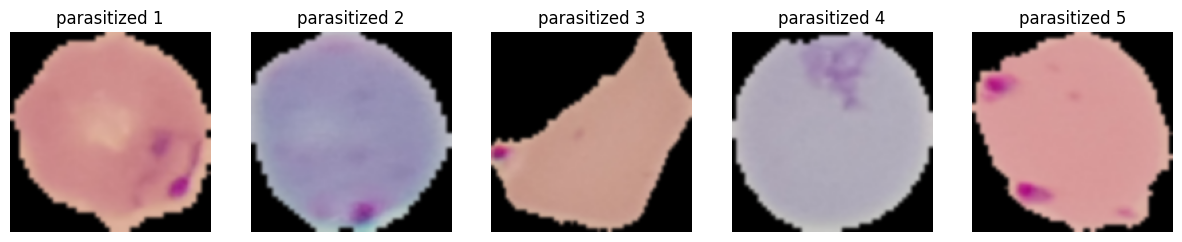

Displaying uninfected samples with Gaussian Blur


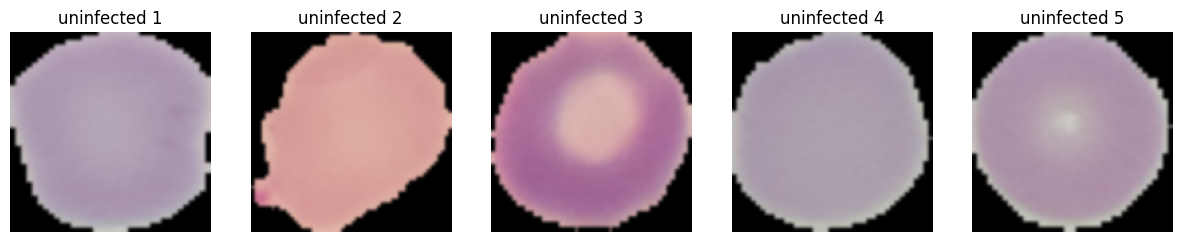

In [86]:
g_data(gaus_data)

###<b> Gaussian Blurring on test data

In [1]:
test_gaus_data = blurred_arrayed_data_set(DATADIR_test, IMG_SIZE)
g_data(test_gaus_data)

NameError: name 'blurred_arrayed_data_set' is not defined

####**Observations and insights: _____**

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?

## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

####<B>One Hot Encoding the train and test labels

In [ ]:
# ------------------------------------------------------------------------------
# LABEL PREPROCESSING
# ------------------------------------------------------------------------------
# CONVERTING INTEGERS TO VECTORS
# ------------------------------------------------------------------------------
def encoding_integers_vectors(label_data, data_type):
  """
  Function takes pandas data frame and converts that to integer then vector.
  """
  print(f"{nl}{ln}{nl}Commence converting integers to vectors for: {data_type}{nl}{ln}{nl}")

  encoded = []

  for label_name in label_data.Labels:
    if label_name == 'Bread':
      encoded.append(0)
    elif label_name == 'Soup':
      encoded.append(1)
    elif label_name =='Vegetable-Fruit':
      encoded.append(2)

    else:
      print('Found category that doesnt match what is being processed.')

  encoded = to_categorical(encoded)
  return {"encoded": encoded}


In [ ]:
# ------------------------------------------------------------------------------
# Encoding Training Data
# ------------------------------------------------------------------------------
y_train_encoded = encoding_integers_vectors(y_train, "< Training >")
y_train_encoded = y_train_encoded['encoded']
print(f"Encoded Data: {nl}{ln}{nl}{y_train_encoded}")

In [ ]:
# ------------------------------------------------------------------------------
# Encoding Testing Data
# ------------------------------------------------------------------------------
y_test_encoded = encoding_integers_vectors(y_tst, "< Testing >")
y_test_encoded = y_test_encoded['encoded']
print(f"Encoded Data: {nl}{ln}{nl}{y_test_encoded}")

In [ ]:
# ------------------------------------------------------------------------------
# Shape of Training Labeled & Image Data
# ------------------------------------------------------------------------------
print(f"Shape of Training Labeled Data: {nl}{ln}{nl}{y_train_encoded.shape}{nl}{nl}{nl}Shape of Training Image Data:{nl}{ln}{nl}{x_train.shape}")

In [ ]:
# ------------------------------------------------------------------------------
# Shape of Testing Labeled & Image Data
# ------------------------------------------------------------------------------
print(f"Shape of Testing Labeled Data: {nl}{ln}{nl}{y_test_encoded.shape}{nl}{nl}{nl}Shape of Testing Image Data:{nl}{ln}{nl}{x_tst.shape}")

###<b> Building the model

In [ ]:
# ------------------------------------------------------------------------------
# TRAINING THE MODEL
# ------------------------------------------------------------------------------
def cnn_model(image, vectrs):
  # Step 1: Free up memory & remove any previous models
  backend.clear_session()

  # Step 2: Set Random SEED
  import random # import the python library randon

  seed = 42

  # ------------------------------------------------------------------------------
  # We leverage three libraries when setting the SEED
  # ------------------------------------------------------------------------------
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

  # ------------------------------------------------------------------------------
  # Create Simple Convolutional Neural Network
  # ------------------------------------------------------------------------------
  model = Sequential() # Like a python LIST

  # ------------------------------------------------------------------------------
  # Convolutional Layer 1
  # ------------------------------------------------------------------------------
  model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3))) # First Convolution Layer
  model.add(MaxPooling2D(padding='same'))


  # ------------------------------------------------------------------------------
  # Convolutional Layer 2
  # ------------------------------------------------------------------------------
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same')) # First Convolution Layer
  model.add(MaxPooling2D(padding='same'))


  # ------------------------------------------------------------------------------
  # Convolutional Layer 2
  # ------------------------------------------------------------------------------
  model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same')) # First Convolution Layer
  model.add(MaxPooling2D(padding='same'))

  # ------------------------------------------------------------------------------
  # Flatten Layer 1
  # ------------------------------------------------------------------------------
  model.add(Flatten())

  # ------------------------------------------------------------------------------
  # Dense Layer 1
  # ------------------------------------------------------------------------------
  model.add(Dense(100, activation='relu'))


  # ------------------------------------------------------------------------------
  # Dense Layer 2
  # ------------------------------------------------------------------------------
  model.add(Dense(3, activation='softmax'))

  # ------------------------------------------------------------------------------
  # Optimization
  # ------------------------------------------------------------------------------
  opti = SGD(learning_rate=0.01, momentum=0.9)

  # ------------------------------------------------------------------------------
  # Compile Model
  # ------------------------------------------------------------------------------
  model.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])

  # ------------------------------------------------------------------------------
  # Early Stopping
  # ------------------------------------------------------------------------------
  early_stopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
  model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

  # ------------------------------------------------------------------------------
  # Run Model or FIT Data to Model
  # ------------------------------------------------------------------------------
  model.fit(image, vectrs, batch_size=32, epochs=60, validation_split = 0.1, callbacks=[early_stopping, model_checkpoint]) # set epochs to a very high number like a million or more

###<b> Compiling the model

<b> Using Callbacks

<b> Fit and train our Model

In [ ]:
cnn_model(x_train, y_test_encoded)

###<b> Evaluating the model on test data

<b> Plotting the confusion matrix

<b>Plotting the train and validation curves

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


###<b> Building the Model

###<b> Compiling the model

<b> Using Callbacks

<b>Fit and Train the model

###<b> Evaluating the model

<b> Plotting the confusion matrix

<b> Plotting the train and the validation curves

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

###<b> Building the Model

###<b>Compiling the model

<b> Using callbacks

<b>Fit and train the model

<b>Plotting the train and validation accuracy

###<b>Evaluating the model

####<b>Observations and insights: ____

<b> Generate the classification report and confusion matrix

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

###<b> Use image data generator

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

####<b>Observations and insights: ____

###<b>Building the Model

<b>Using Callbacks

<b> Fit and Train the model

###<B>Evaluating the model

<b>Plot the train and validation accuracy

<B>Plotting the classification report and confusion matrix

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

###<b>Compiling the model

<b> using callbacks

<b>Fit and Train the model

<b>Plot the train and validation accuracy

###**Observations and insights: _____**

*   What can be observed from the validation and train curves?

###<b> Evaluating the model

<b>Plotting the classification report and confusion matrix

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


####<b> Observations and Conclusions drawn from the final model: _____



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?